In [110]:
from __future__ import print_function

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Baseball salary data

In this tutorial, we will look at the salary of Major League Baseball (MLB) players. [source from baseballguru.com](http://baseballguru.com/salary.zip).

Packages you are going to use are usually imported at the very beginning of your code (python or ipython-notebook)

### Read in the data

`Python` can read data from data files such as `CSV`, `TXT` using built-in modules. `Pandas` support reading data from more formats, also including the output from other softwares such as `STATA` and `SAS`. `Google` for "Python load data xx format" should usually point you to the right direction. `CSV` is usually one of the most widely used format for data nowadays.

Now let's read in the baseball salary data set.

In [4]:
file_path = "BaseballSalary.csv"  # notice the difference between relative path and absolute path
BaseballSalary = pd.read_csv(file_path)

Peek the data

In [8]:
BaseballSalary.head(20)

,playtmlgyr,LName,FName,year,teamID,LG,salary,playerID
0,aardsda012004SFN,Aardsma,David,2004,SFN,N,300000,aardsda01
1,aasedo011986BAL,Aase,Don,1986,BAL,A,600000,aasedo01
2,aasedo011987BAL,Aase,Don,1987,BAL,A,625000,aasedo01
3,aasedo011988BAL,Aase,Don,1988,BAL,A,675000,aasedo01
4,aasedo011989NYN,Aase,Don,1989,NYN,N,400000,aasedo01
5,abbotje011998CHA,Abbott,Jeff,1998,CHA,A,175000,abbotje01
6,abbotje011999CHA,Abbott,Jeff,1999,CHA,A,255000,abbotje01
7,abbotje012000CHA,Abbott,Jeff,2000,CHA,A,255000,abbotje01
8,abbotje012001FLO,Abbott,Jeff,2001,FLO,N,300000,abbotje01
9,abbotji011989CAL,Abbott,Jim,1989,CAL,A,68000,abbotji01


### Explore the data with graphs

Choice: use pyplot directly.

It is not easy to assign different colors to each bar. You need to extract those bars separately and set color for them in a loop.

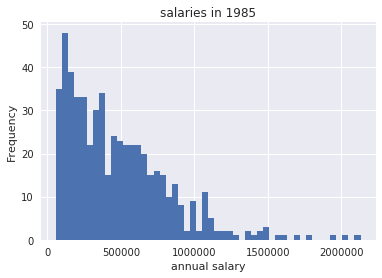

In [32]:
# col.use=brewer.pal(10, "RdYlBu")
hist1=plt.hist(BaseballSalary[BaseballSalary['year'] == 1985]['salary'], bins=50)
plt.xlabel('annual salary')
plt.ylabel('Frequency')
plt.title('salaries in 1985')

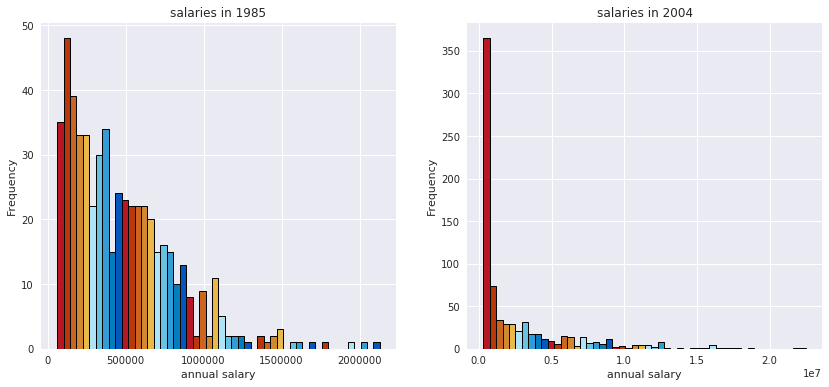

In [79]:
nbins = 50
fg = plt.figure(figsize=(14, 6))
ax1 = fg.add_subplot(1, 2, 1)
ax2 = fg.add_subplot(1, 2, 2)
col_arr = np.array(['#b71722', '#ba360b', '#cc6520', '#d18830', '#e8b84a', '#ade4f7', '#68c3e2', '#319cd6', '#057cbc', '#0457bc'])

ax1.set_xlabel('annual salary')
ax1.set_ylabel('Frequency')
ax1.set_title('salaries in 1985')

h1=ax1.hist(BaseballSalary[BaseballSalary['year'] == 1985]['salary'], bins=nbins, edgecolor='black', linewidth=1)

for i in xrange(nbins):
    ax1.get_children()[i].set_facecolor(col_arr[i % 10])

#################

ax2.set_xlabel('annual salary')
ax2.set_ylabel('Frequency')
ax2.set_title('salaries in 2004')

h2=ax2.hist(BaseballSalary[BaseballSalary['year'] == 2004]['salary'], bins=nbins, edgecolor='black', linewidth=1)

for i in xrange(nbins):
    ax2.get_children()[i].set_facecolor(col_arr[i % 10])

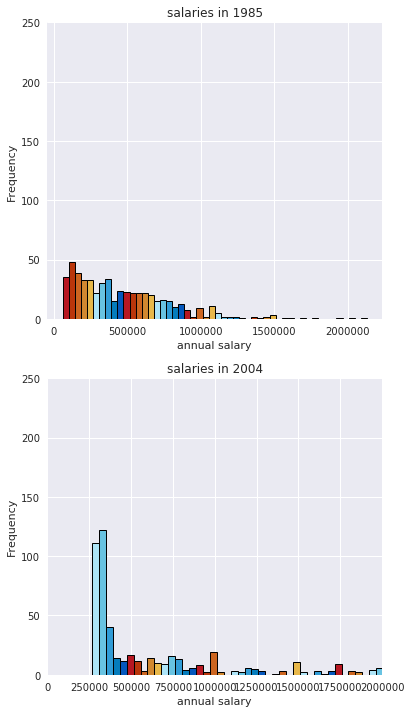

In [84]:
nbins = 50
fg = plt.figure(figsize=(6, 12))
ax1 = fg.add_subplot(2, 1, 1)
ax2 = fg.add_subplot(2, 1, 2)
col_arr = np.array(['#b71722', '#ba360b', '#cc6520', '#d18830', '#e8b84a', '#ade4f7', '#68c3e2', '#319cd6', '#057cbc', '#0457bc'])

ax1.set_xlabel('annual salary')
ax1.set_ylabel('Frequency')
ax1.set_title('salaries in 1985')
ax1.set_ylim(0, 250)

_, b1, _ = ax1.hist(BaseballSalary[BaseballSalary['year'] == 1985]['salary'], bins=nbins, edgecolor='black', linewidth=1)

for i in xrange(nbins):
    ax1.get_children()[i].set_facecolor(col_arr[i % 10])

#################

ax2.set_xlabel('annual salary')
ax2.set_ylabel('Frequency')
ax2.set_title('salaries in 2004')
ax2.set_xlim(0, 2000000)
ax2.set_ylim(0, 250)

h2=ax2.hist(BaseballSalary[BaseballSalary['year'] == 2004]['salary'], bins=b1, edgecolor='black', linewidth=1)

for i in xrange(nbins):
    ax2.get_children()[i].set_facecolor(col_arr[i % 10])

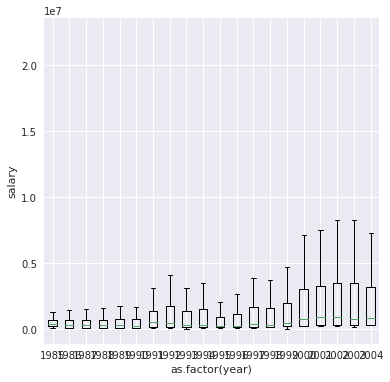

In [97]:
nyear = BaseballSalary.year.unique().shape[0]
fg = plt.figure(figsize=(6, 6))
ax = fg.add_subplot(1, 1, 1)

ax.set_xlabel('as.factor(year)')
ax.set_ylabel('salary')

labels = np.arange(1985, 2005)

dat = []
for i in xrange(1985, 2005):
    dat.append(BaseballSalary[BaseballSalary['year'] == i]['salary'])
    
b1 = ax.boxplot(dat, labels=labels)

(20,)


In [102]:
BSgroup = BaseballSalary.groupby([BaseballSalary['teamID'], BaseballSalary['year']])
BSTeamYear = BSgroup.describe()
BSTeamYear

salary                                                   \
             count          mean           std       min        25%   
teamID year                                                           
ANA    1997   31.0  1.004370e+06  1.164784e+06  150000.0  168500.00   
       1998   34.0  1.214147e+06  1.490771e+06  170000.0  202500.00   
       1999   40.0  1.384704e+06  1.864172e+06  200000.0  213750.00   
       2000   30.0  1.715472e+06  2.490123e+06  200000.0  210000.00   
       2001   30.0  1.584506e+06  2.656577e+06  200000.0  255000.00   
       2002   28.0  2.204345e+06  2.941187e+06  200000.0  273750.00   
       2003   27.0  2.927099e+06  3.462697e+06  300000.0  322500.00   
       2004   27.0  3.723506e+06  3.894053e+06  301500.0  375000.00   
ARI    1998   36.0  8.985278e+05  1.583031e+06  170000.0  183125.00   
       1999   34.0  2.020706e+06  2.708787e+06  200000.0  245000.00   
       2000   28.0  2.893851e+06  3.198344e+06  215000.0  687500.00   
       2001   28.0  3.038679e+06  3.338601e+06  200000.0  481250.00   
       2002   33.0  3.115758e+06  3.358970e+06  215000.0  500000.00   
       2003   25.0  3.226280e+06  3.776931e+06  300000.0  300000.00   
       2004   29.0  2.406233e+06  3.695155e+06  300000.0  325750.00   
ATL    1985   22.0  6.730455e+05  3.970351e+05  120000.0  451250.00   
       1986   29.0  5.897512e+05  5.014933e+05   60000.0  200000.00   
       1987   32.0  5.170175e+05  4.592785e+05   62500.0  142500.00   
       1988   29.0  4.389026e+05  4.819618e+05   62500.0   78000.00   
       1989   30.0  3.704111e+05  4.656358e+05   68000.0   83000.00   
       1990   32.0  4.548594e+05  5.417272e+05  100000.0  111000.00   
       1991   25.0  7.361400e+05  6.558317e+05  110000.0  190000.00   
       1992   31.0  1.116946e+06  1.017791e+06  109000.0  307500.00   
       1993   33.0  1.261861e+06  1.459053e+06  109000.0  140000.00   
       1994   30.0  1.646117e+06  1.737763e+06  109000.0  152000.00   
       1995   29.0  1.628808e+06  2.068859e+06  109000.0  111500.00   
       1996   30.0  1.656617e+06  2.278288e+06  109000.0  111500.00   
       1997   31.0  1.686403e+06  2.174873e+06  150000.0  177500.00   
       1998   32.0  1.912062e+06  2.773582e+06  170000.0  180625.00   
       1999   29.0  2.522069e+06  2.968817e+06  200000.0  230000.00   
...            ...           ...           ...       ...        ...   
TEX    1993   38.0  9.572884e+05  1.382958e+06  109000.0  116250.00   
       1994   33.0  9.991999e+05  1.414269e+06  109000.0  130000.00   
       1995   34.0  1.017102e+06  1.514333e+06  109000.0  126250.00   
       1996   33.0  1.183077e+06  1.717531e+06  109000.0  175000.00   
       1997   37.0  1.444563e+06  2.103245e+06  150000.0  185000.00   
       1998   30.0  1.885736e+06  2.152358e+06  170000.0  278750.00   
       1999   30.0  2.556998e+06  2.721409e+06  200000.0  450000.00   
       2000   26.0  2.722920e+06  2.785456e+06  200000.0  257500.00   
       2001   31.0  2.859145e+06  4.465938e+06  202500.0  297500.00   
       2002   28.0  3.768790e+06  4.887240e+06  200000.0  587500.00   
       2003   30.0  3.449722e+06  5.077722e+06  300000.0  562500.00   
TOR    1985   20.0  4.363093e+05  2.666631e+05   60000.0  238750.25   
       1986   27.0  4.683104e+05  3.694763e+05   60000.0  126250.00   
       1987   23.0  4.592537e+05  4.267124e+05   62500.0   87250.00   
       1988   26.0  4.669702e+05  4.668800e+05   62500.0  108500.00   
       1989   28.0  5.589166e+05  5.884859e+05   68000.0  105500.00   
       1990   27.0  6.521050e+05  5.786652e+05  100000.0  211250.00   
       1991   24.0  7.042674e+05  9.319857e+05  100000.0  141250.00   
       1992   36.0  1.244130e+06  1.309384e+06  109000.0  125875.00   
       1993   33.0  1.432702e+06  1.748857e+06  109000.0  160000.00   
       1994   30.0  1.447789e+06  1.749681e+06  109000.0  155000.00   
       1995   33.0  1.533030e+06  2.355645e+06  109000.0  112500.00   
       1996   33.0  8.956086e+05  1.

In [109]:
BSTeamYear.swaplevel(0, 1).loc[2004]

salary                                                             \
        count          mean           std       min       25%        50%   
teamID                                                                     
ANA      27.0  3.723506e+06  3.894053e+06  301500.0  375000.0  2150000.0   
ARI      29.0  2.406233e+06  3.695155e+06  300000.0  325750.0   500000.0   
ATL      28.0  3.220804e+06  4.676109e+06  300000.0  373750.0   737500.0   
BAL      28.0  1.843690e+06  1.956007e+06  300000.0  338750.0   887500.0   
BOS      30.0  4.243283e+06  5.324827e+06  300000.0  562500.0  3087500.0   
CHA      26.0  2.508173e+06  3.354654e+06  301000.0  340000.0   775000.0   
CHN      29.0  3.122759e+06  3.609922e+06  300000.0  650000.0  1550000.0   
CIN      28.0  1.664830e+06  2.724494e+06  300000.0  319500.0   422500.0   
CLE      30.0  1.143977e+06  1.860274e+06  301000.0  315325.0   325000.0   
COL      28.0  2.337327e+06  3.843770e+06  300000.0  320000.0   575000.0   
DET      28.0  1.672571e+06  2.392549e+06  300000.0  322750.0   362500.0   
FLO      27.0  1.560853e+06  1.692648e+06  300000.0  315000.0   600000.0   
HOU      25.0  3.015880e+06  4.213469e+06  307500.0  370000.0   750000.0   
KCA      30.0  1.586967e+06  2.514437e+06  300000.0  318125.0   436250.0   
LAN      27.0  3.440815e+06  4.036428e+06  301000.0  334250.0  1500000.0   
MIL      25.0  1.101140e+06  1.778743e+06  300000.0  326000.0   400000.0   
MIN      26.0  2.060962e+06  2.679710e+06  300000.0  322500.0   525000.0   
MON      29.0  1.410259e+06  1.891129e+06  300000.0  310000.0   350000.0   
NYA      29.0  6.351516e+06  6.353267e+06  301400.0  900000.0  3100000.0   
NYN      28.0  3.452178e+06  4.728817e+06  300000.0  319125.0   900000.0   
OAK      28.0  2.122345e+06  2.516056e+06  300500.0  342625.0  1357500.0   
PHI      26.0  3.573814e+06  3.777726e+06  300000.0  556250.0  2512500.0   
PIT      27.0  1.193627e+06  1.902801e+06  300000.0  308250.0   350000.0   
SDN      26.0  2.130186e+06  2.574542e+06  300000.0  375000.0   862500.0   
SEA      28.0  2.911280e+06  2.403039e+06  300000.0  937500.0  2658333.5   
SFN      31.0  2.645780e+06  3.817280e+06  300000.0  338250.0  1000000.0   
SLN      26.0  3.201090e+06  3.672610e+06  300000.0  468750.0  1100000.0   
TBA      19.0  1.292982e+06  1.694905e+06  302500.0  320000.0   600000.0   

                                 
                75%         max  
teamID                           
ANA      6975000.00  11000000.0  
ARI      2750000.00  16000000.0  
ATL      3825000.00  15333333.0  
BAL      3000000.00   7000000.0  
BOS      4500000.00  22500000.0  
CHA      3875000.00  14000000.0  
CHN      5750000.00  16000000.0  
CIN      1836250.00  12500000.0  
CLE       906250.00   7250000.0  
COL      1400000.00  12666667.0  
DET      2562500.00   8850000.0  
FLO      2650000.00   6500000.0  
HOU      3400000.00  16000000.0  
KCA      1625000.00  11000000.0  
LAN      5000000.00  16666667.0  
MIL       700000.00   8737500.0  
MIN      3493750.00  10750000.0  
MON      1950000.00   7000000.0  
NYA     10890000.00  22000000.0  
NYN      4499999.75  17166667.0  
OAK      3000000.00  11666667.0  
PHI      4393750.00  12166667.0  
PIT       975000.00   8571429.0  
SDN      2500000.00   8833333.0  
SEA      3937500.25   8000000.0  
SFN      2900000.00  18000000.0  
SLN      6593750.00  12500000.0  
TBA      1725000.00   7500000.0